<Figure size 640x480 with 0 Axes>

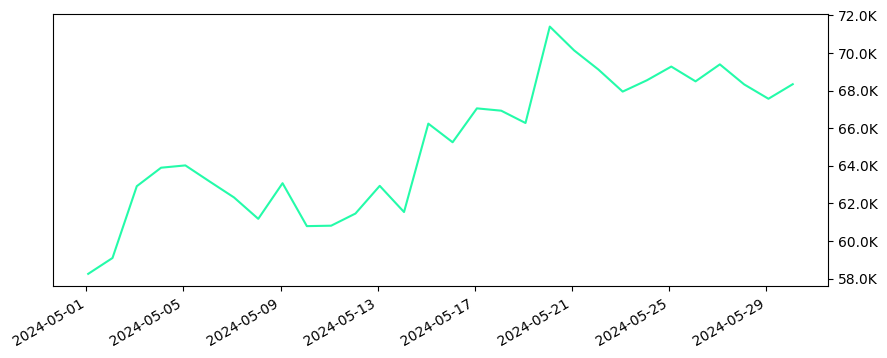

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date
import matplotlib.ticker as mticker

df = pd.read_csv('BITSTAMP_BTCUSD, 1D.csv')
df['time'] = df['time'].apply(lambda x: datetime.fromtimestamp(x))
df = df[(df['time'] >= datetime.fromisoformat('2024-05-01')) & (df['time'] <= datetime.fromisoformat('2024-05-31'))]



#df['Bitcoin_mining_difficulty'] = df['diff']


x = df['time']
y1 = df['close']

fig = plt.figure()
fig, ax = plt.subplots(figsize=(10,4))




ax.xaxis_date()
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
fig.autofmt_xdate()

ax.plot(x, y1, label='BTC/USD', color = (36/255, 251/255, 169/255))
#ax.fill_between(x, y1, color = (36/255, 251/255, 169/255), alpha = 0.1)

# format number to a more readable form
def human_format(num):
    magnitude = 0
    while abs(num) >= 100:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.1f%s' % (num, ['', 'K', 'M', 'bn', 'T', 'TT'][magnitude])

ticks_loc = ax.get_yticks().tolist();
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc));
ax.set_yticklabels([human_format(x) for x in ticks_loc]);
ticks_loc = ax.get_yticks().tolist();
ax.yaxis.tick_right()
